<a href="https://colab.research.google.com/github/HabibaJahn/Rice_disease_detection/blob/habiba/Model_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Set your dataset paths
dataset_path = '/content/drive/My Drive/AI Project/dataset'  # change to your path
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

def count_images(folder_path):
    total = 0
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            total += len(os.listdir(class_path))
    return total

train_count = count_images(train_path)
test_count = count_images(test_path)

print(f"🖼️ Total training images: {train_count}")
print(f"🧪 Total testing images: {test_count}")


🖼️ Total training images: 14366
🧪 Total testing images: 3422


In [ ]:
import os
import shutil
import random

# Set your paths
dataset_dir = '/content/drive/My Drive/AI Project/dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

# Create validation directory if not exist
os.makedirs(val_dir, exist_ok=True)

# Split ratio (e.g., 25% of training data to validation)
val_split = 0.25

# Loop through each class folder in training data
for class_name in os.listdir(train_dir):
    class_train_path = os.path.join(train_dir, class_name)
    class_val_path = os.path.join(val_dir, class_name)

    # Create class folder in validation directory
    os.makedirs(class_val_path, exist_ok=True)

    # Get all files in class folder
    images = os.listdir(class_train_path)
    random.shuffle(images)

    # Split and move files
    val_count = int(len(images) * val_split)
    val_images = images[:val_count]

    for img in val_images:
        src = os.path.join(class_train_path, img)
        dst = os.path.join(class_val_path, img)
        shutil.move(src, dst)

print("Validation folder created and populated successfully.")


Validation folder created and populated successfully.


In [ ]:
import os

base_dir = '/content/drive/My Drive/AI Project/dataset'
splits = ['train', 'validation', 'test']

for split in splits:
    split_path = os.path.join(base_dir, split)
    print(f"\n📁 {split.upper()} set:")

    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if not os.path.isdir(class_path):
            continue

        num_images = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ])
        print(f"  🏷️ Class '{class_name}': {num_images} images")



📁 TRAIN set:
  🏷️ Class 'neck_blast': 750 images
  🏷️ Class 'leaf_blast': 1352 images
  🏷️ Class 'rice_hispa': 1096 images
  🏷️ Class 'narrow_brown_spot': 1062 images
  🏷️ Class 'tungro': 812 images
  🏷️ Class 'leaf_scald': 1253 images
  🏷️ Class 'bacterial_leaf_blight': 1040 images
  🏷️ Class 'sheath_blight': 1184 images
  🏷️ Class 'healthy': 1119 images
  🏷️ Class 'brown_spot': 1110 images

📁 VALIDATION set:
  🏷️ Class 'neck_blast': 250 images
  🏷️ Class 'leaf_blast': 450 images
  🏷️ Class 'rice_hispa': 365 images
  🏷️ Class 'narrow_brown_spot': 354 images
  🏷️ Class 'tungro': 270 images
  🏷️ Class 'leaf_scald': 417 images
  🏷️ Class 'bacterial_leaf_blight': 346 images
  🏷️ Class 'sheath_blight': 394 images
  🏷️ Class 'healthy': 372 images
  🏷️ Class 'brown_spot': 370 images

📁 TEST set:
  🏷️ Class 'narrow_brown_spot': 382 images
  🏷️ Class 'leaf_blast': 362 images
  🏷️ Class 'leaf_scald': 386 images
  🏷️ Class 'healthy': 391 images
  🏷️ Class 'brown_spot': 380 images
  🏷️ Class 'ba

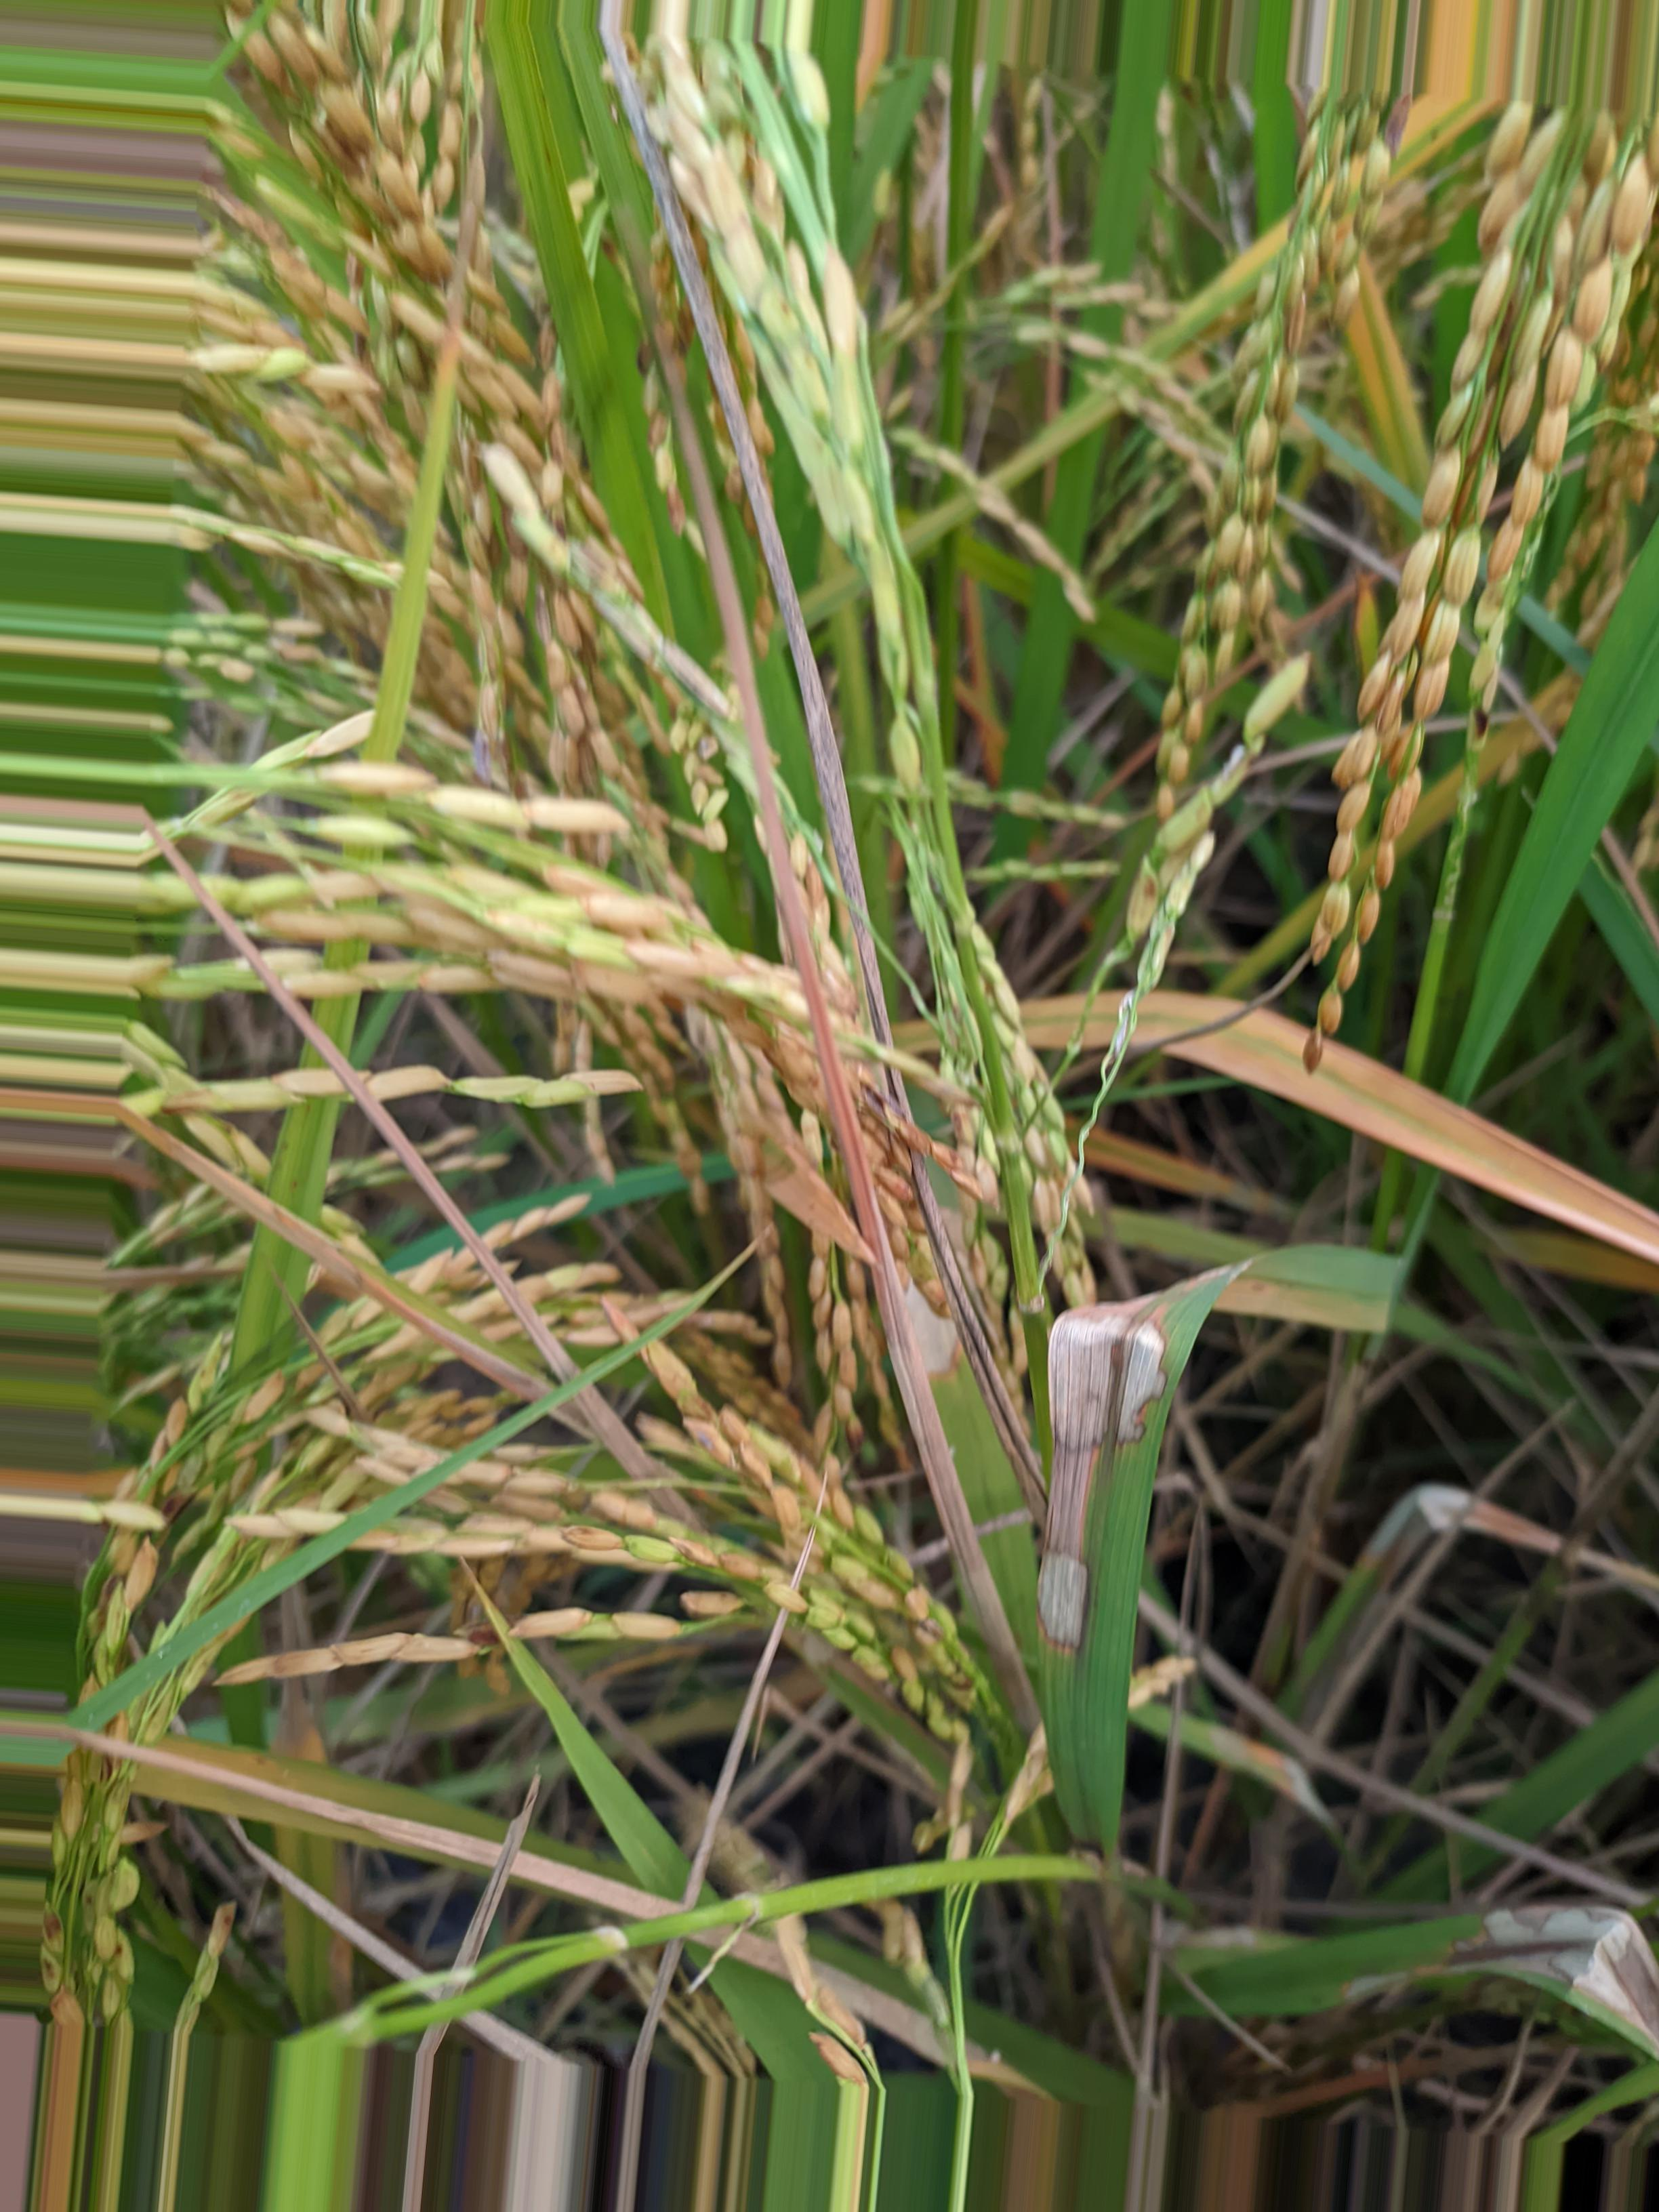

In [ ]:
from PIL import Image
import IPython.display as display

# Example path to an image in your split dataset
image_path = '/content/drive/My Drive/AI Project/dataset/train/sheath_blight/sheath_blight1575.jpg'

# Open and display the image
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=300))



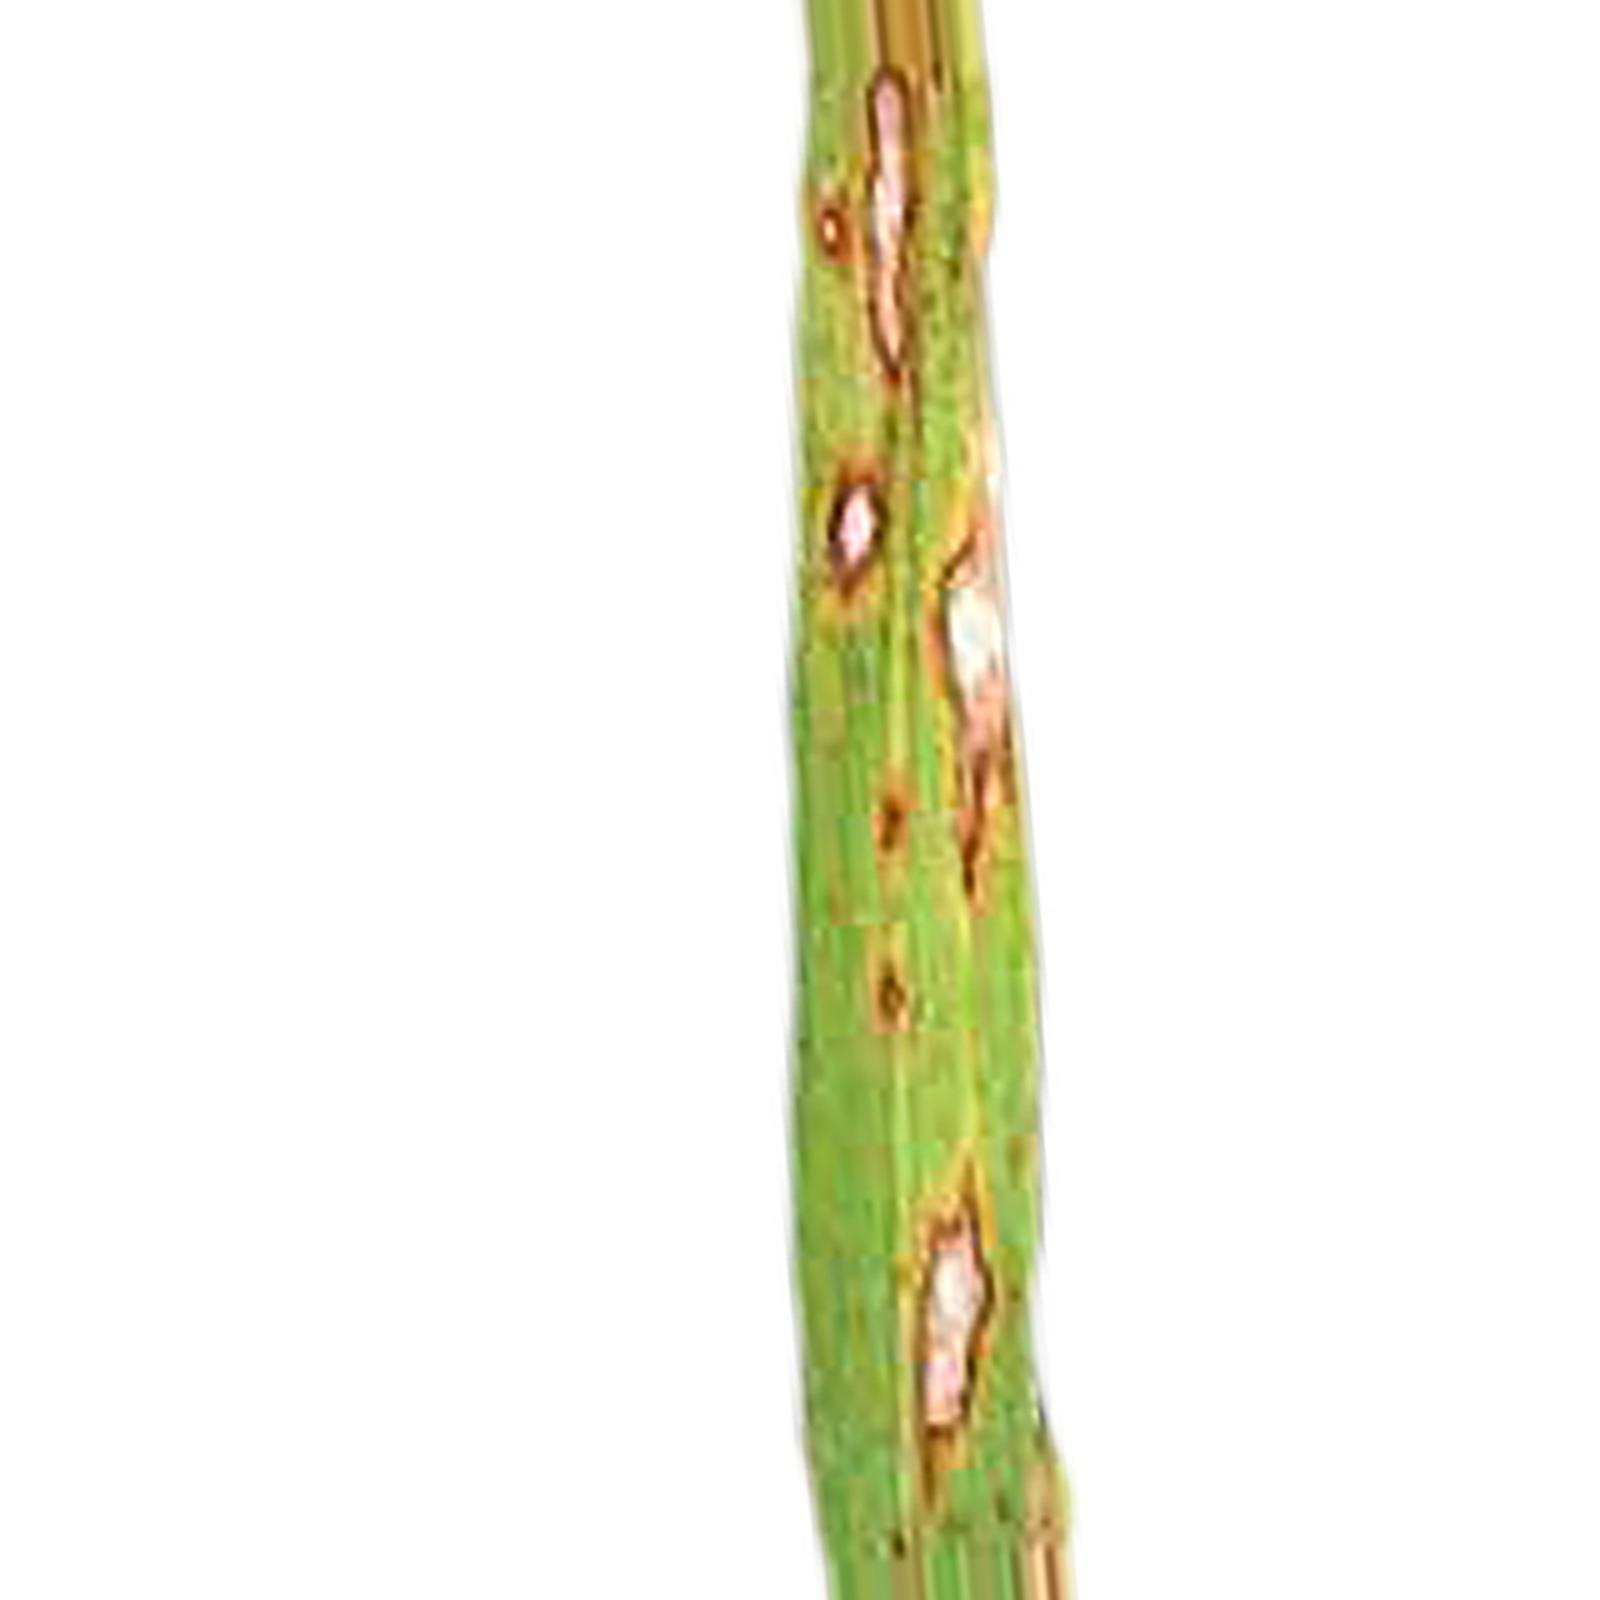

In [ ]:
from PIL import Image
import IPython.display as display

# Example path to an image in your split dataset
image_path = '/content/drive/My Drive/AI Project/dataset/train/leaf_blast/leaf_blast1794.jpg'

# Open and display the image
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=300))



In [2]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/AI Project/dataset/train',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/AI Project/dataset/validation',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/AI Project/dataset/test',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: do not shuffle for accurate evaluation
)

Found 10778 images belonging to 10 classes.
Found 3588 images belonging to 10 classes.
Found 3422 images belonging to 10 classes.


In [8]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(225, 225, 3))
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [10]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=20,  # Start with more
    validation_data=validation_generator,
    callbacks=[early_stop]
)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 5894s 17s/step - accuracy: 0.5620 - loss: 1.2812 - val_accuracy: 0.8347 - val_loss: 0.4734
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.7879 - loss: 0.6024 - val_accuracy: 0.8866 - val_loss: 0.3372
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.8413 - loss: 0.4725 - val_accuracy: 0.9036 - val_loss: 0.2840
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.8532 - loss: 0.4186 - val_accuracy: 0.9161 - val_loss: 0.2511
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.8704 - loss: 0.3734 - val_accuracy: 0.9228 - val_loss: 0.2288
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 360s 1s/step - accuracy: 0.8827 - loss: 0.3304 - val_accuracy: 0.9264 - val_loss: 0.2166
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.8796 - loss: 0.3391 - val_accuracy: 0.9342 - val_loss: 0.2007
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.8923 - loss: 0.3076 - val_ac

In [12]:
model.save('/content/drive/My Drive/AI Project/efficientnet_model.keras')


In [13]:
model.save('/content/drive/My Drive/AI Project/efficientnet_model.h5')


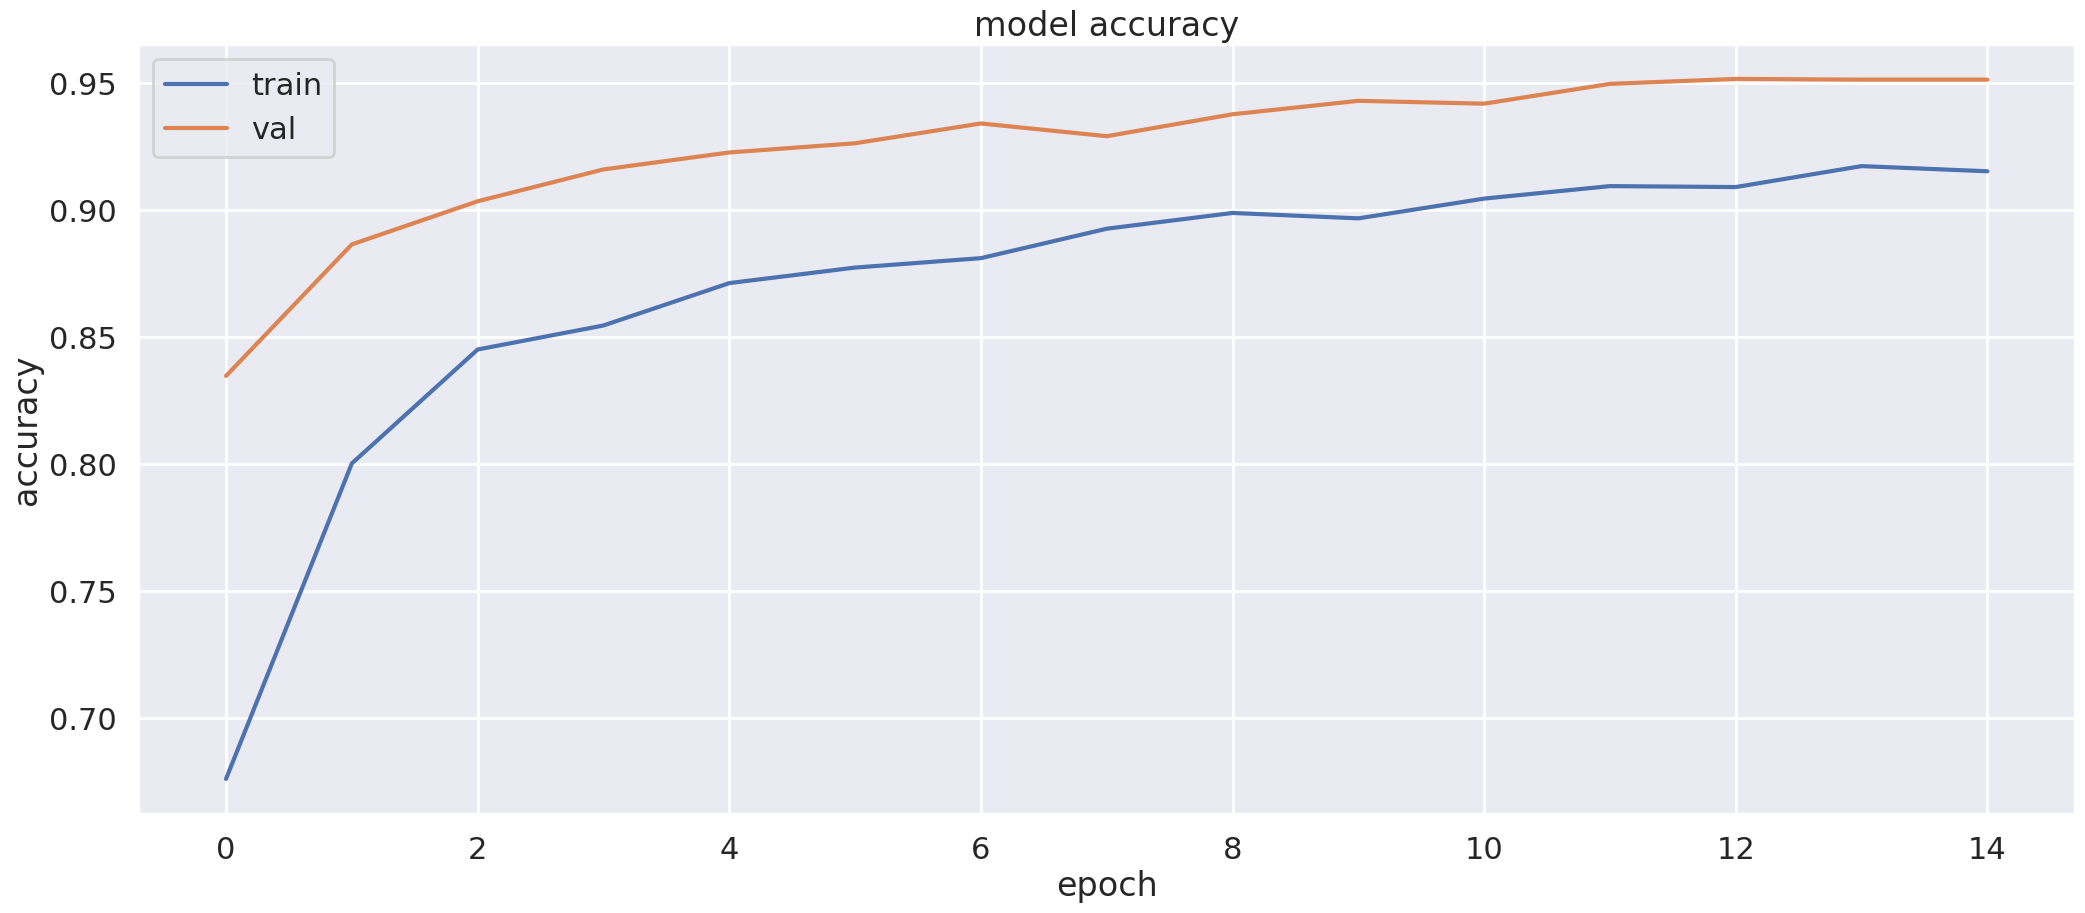

In [15]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 10), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/AI Project/dataset/test',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: do not shuffle for accurate evaluation
)

Found 3422 images belonging to 10 classes.


In [19]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = load_model("/content/drive/My Drive/AI Project/efficientnet_model.keras")

In [20]:


import numpy as np

y_pred_probs = model.predict(test_generator)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 1366s 13s/step


In [21]:

from sklearn.metrics import classification_report, accuracy_score

print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

acc = accuracy_score(y_true, y_pred)
print(f"🔍 Overall Test Accuracy: {acc:.4f}")

✅ Classification Report:
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.99      0.99      0.99       376
           brown_spot       0.91      0.91      0.91       380
              healthy       0.95      0.97      0.96       391
           leaf_blast       0.91      0.88      0.89       362
           leaf_scald       0.98      0.98      0.98       386
    narrow_brown_spot       0.91      0.97      0.94       382
           neck_blast       1.00      1.00      1.00       322
           rice_hispa       0.98      0.95      0.96       225
        sheath_blight       1.00      0.94      0.97       288
               tungro       1.00      0.99      1.00       310

             accuracy                           0.96      3422
            macro avg       0.96      0.96      0.96      3422
         weighted avg       0.96      0.96      0.96      3422

🔍 Overall Test Accuracy: 0.9600
